<a href="https://colab.research.google.com/github/moebarati/CLS_Final_Project/blob/main/gen_emotion_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
####### IMPORTING AND DOWNLOADING THE NECESSARY LIBARARIES AND MODULES
import pandas as pd
import re
import numpy as np
import json
import seaborn as sn
import os
import math
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats
from sklearn.feature_selection import chi2

from collections import Counter
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
first_dict = 'gdrive/MyDrive/ColabNotebooks/NLP_Files/SharedFolder/CLS/Data/dict_first_final.json'
second_dict = 'gdrive/MyDrive/ColabNotebooks/NLP_Files/SharedFolder/CLS/Data/dict_second_final.json'
third_dict = 'gdrive/MyDrive/ColabNotebooks/NLP_Files/SharedFolder/CLS/Data/dict_third_final.json'

In [ ]:
def produce_df(file_path):
  with open(file_path, 'r', encoding = 'utf-8') as file:
    data = json.load(file)
    df = pd.DataFrame.from_dict(data, orient = 'index')
  return df

In [ ]:
first_df = produce_df(first_dict)
second_df = produce_df(second_dict)
third_df = produce_df(third_dict)

dfs = (first_df, second_df, third_df)
umbrella_df = pd.concat(dfs, ignore_index = True)

In [ ]:
umbrella_df

title  \
0     Three hours after marriage   
1             The beggarís opera   
2                         Pamela   
3                         Pamela   
4                         Pamela   
...                          ...   
1428                 Beau Austin   
1429               Deacon Brodie   
1430               Deacon Brodie   
1431               Deacon Brodie   
1432               Deacon Brodie   

                                               author gender     period  \
0                                           Gay, John      M  1710-1780   
1                                           Gay, John      M  1710-1780   
2                                  Richardson, Samuel      M  1710-1780   
3                                  Richardson, Samuel      M  1710-1780   
4                                  Richardson, Samuel      M  1710-1780   
...                                               ...    ...        ...   
1428  Henley, William Ernest & Robert Louis Stevenson      M  1850-1920   
1429  Henley, William Ernest & Robert Louis Stevenson      M  1850-1920   
1430  Henley, William Ernest & Robert Louis Stevenson      M  1850-1920   
1431  Henley, William Ernest & Robert Louis Stevenson      M  1850-1920   
1432  Henley, William Ernest & Robert Louis Stevenson      M  1850-1920   

      quartcent decade  year       birth   match colour_family  ... bert_15  \
0     1700-1724  1710s  1717        1685     red           red  ...   anger   
1     1725-1749  1720s  1728        1685   black         black  ...     joy   
2     1725-1749  1740s  1740        1689   black         black  ...     joy   
3     1725-1749  1740s  1740        1689   white         white  ...     joy   
4     1725-1749  1740s  1740        1689  silver          grey  ...   anger   
...         ...    ...   ...         ...     ...           ...  ...     ...   
1428  1875-1899  1890s  1892  1850, 1849   black         black  ...     joy   
1429  1875-1899  1890s  1892  1850, 1849   green         green  ...     joy   
1430  1875-1899  1890s  1892  1850, 1849   black         black  ...   anger   
1431  1875-1899  1890s  1892  1850, 1849   white         white  ...   anger   
1432  1875-1899  1890s  1892  1850, 1849     red           red  ...     joy   

       xlm_15                                            text_20    t2e_20  \
0        fear  young mare . When a deflower'd virgin take ten...       Sad   
1         joy  Industry , one may still have a little Picking...      Fear   
2       anger  begin to be afraid I know too well the reason ...       Sad   
3       anger  took my hand . O ! said she , I can not tell y...  Surprise   
4         joy  Jewkes came in with the canary , brought by Na...  Surprise   
...       ...                                                ...       ...   
1428    anger  you , too , Tom did : said you 'd given him a ...      Fear   
1429      joy  as ninepence ! He 's taking it down like mothe...  Surprise   
1430  sadness  mouth ; and he keept aye harp , harpin ' ; but...       Sad   
1431  sadness  and he keept aye harp , harpin ' ; but after t...       Sad   
1432      joy  Cos , if so , you 've only got to cast your ey...     Happy   

      bert_20   xlm_20                                            text_25  \
0        fear     fear  from the Hippomanes of a young mare . When a d...   
1         joy      joy  many Interlopers -- Yet with Industry , one ma...   
2        fear     fear  . -- And now I begin to be afraid I know too w...   
3         joy     fear  came to me , and took my hand . O ! said she ,...   
4         joy      joy  to do me . Mrs. Jewkes came in with the canary...   
...       ...      ...                                                ...   
1428  sadness    anger  us . He spoke of you , too , Tom did : said yo...   
1429    anger    anger  MOORE ) . As neat as ninepence ! He 's taking ...   
1430    anger  sadness  butter wouldna melt in his mouth ; and he keep...   
1431    anger  sadness  melt in his m

In [ ]:
reference_predictor = 'bert_20'

In [ ]:
def gender_author_plot(df):
  author_gender = df.groupby('gender')['author'].nunique()
  print(author_gender)
  author_gender.plot(kind = 'bar')
  plt.xticks(rotation = 0)
  return plt.show()

gender
F     5
M    18
Name: author, dtype: int64


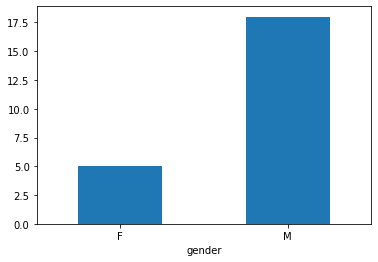

gender
F    18
M    18
Name: author, dtype: int64


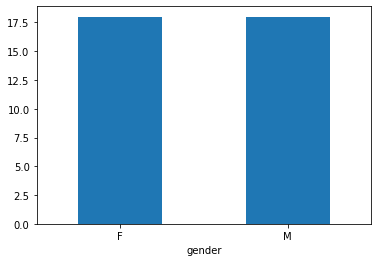

gender
F    14
M    36
Name: author, dtype: int64


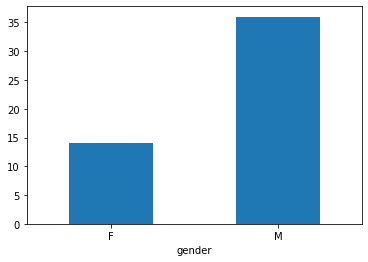

In [ ]:
plt1 = gender_author_plot(first_df)
plt2 = gender_author_plot(second_df)
plt3 = gender_author_plot(third_df)

In [ ]:
def gender_colour(df):
  raw_gender_colour = df.groupby('colour_family')['gender'].value_counts().unstack()
  print(raw_gender_colour)
  raw_gender_colour.plot(kind = 'bar', figsize = (13, 9))
  plt.xticks(rotation = 90)
  return plt.show()

def norm_gender_colour(df):
  norm_gender_colour = df.groupby('colour_family')['gender'].value_counts(normalize = True).unstack()
  print(norm_gender_colour)
  norm_gender_colour.plot(kind = 'bar', figsize = (13, 9))
  plt.xticks(rotation = 90)
  return plt.show()

gender           F    M
colour_family          
black           53  108
blue            53   87
brown           46   77
green           45   89
grey            64  119
orange          18   19
pink            27   29
purple          30   38
red            108  158
white           56  102
yellow          44   63


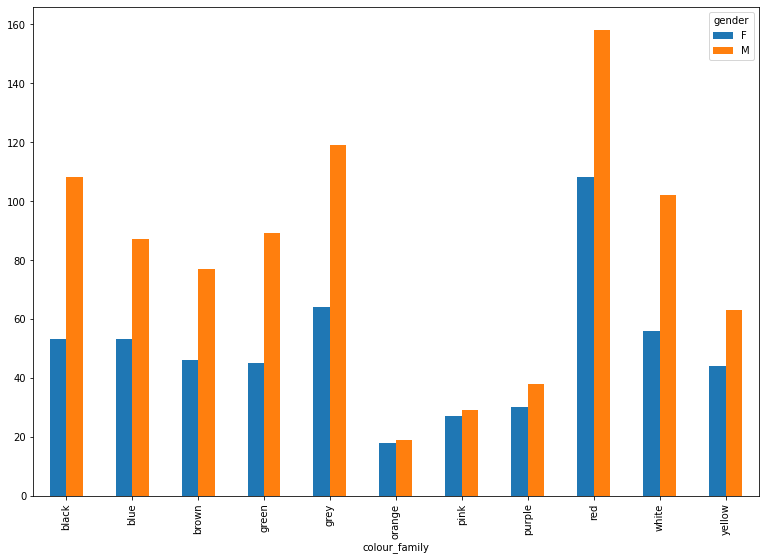

In [ ]:
gender_colour(umbrella_df)

gender                F         M
colour_family                    
black          0.329193  0.670807
blue           0.378571  0.621429
brown          0.373984  0.626016
green          0.335821  0.664179
grey           0.349727  0.650273
orange         0.486486  0.513514
pink           0.482143  0.517857
purple         0.441176  0.558824
red            0.406015  0.593985
white          0.354430  0.645570
yellow         0.411215  0.588785


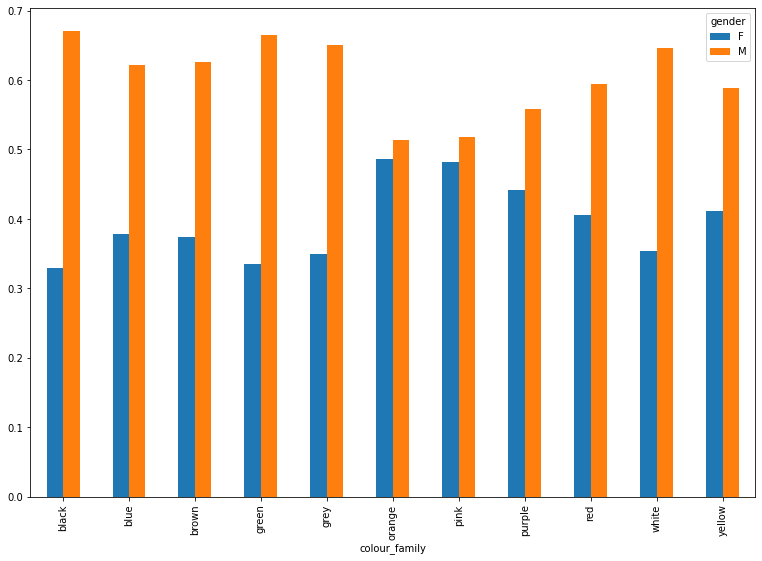

In [ ]:
norm_gender_colour(umbrella_df)

gender           F     M
colour_family           
black          8.0  21.0
blue           3.0  12.0
brown          5.0  10.0
green          4.0   9.0
grey           7.0  15.0
orange         NaN   2.0
pink           NaN   1.0
purple         NaN   2.0
red            9.0  21.0
white          9.0  13.0
yellow         4.0   5.0


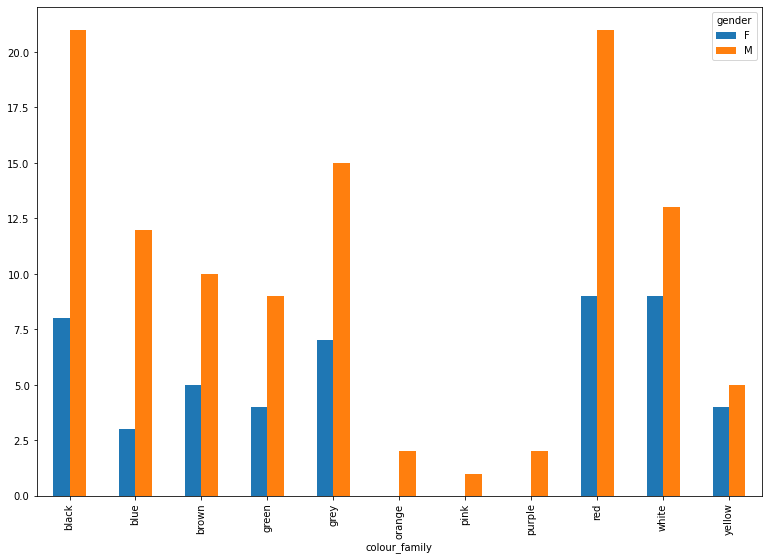

In [ ]:
gender_colour(first_df)

gender                F         M
colour_family                    
black          0.275862  0.724138
blue           0.200000  0.800000
brown          0.333333  0.666667
green          0.307692  0.692308
grey           0.318182  0.681818
orange              NaN  1.000000
pink                NaN  1.000000
purple              NaN  1.000000
red            0.300000  0.700000
white          0.409091  0.590909
yellow         0.444444  0.555556


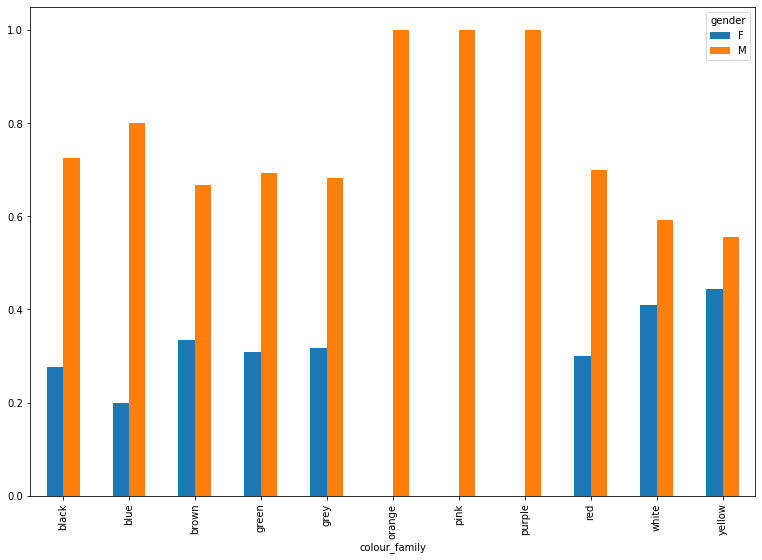

In [ ]:
norm_gender_colour(first_df)

gender          F   M
colour_family        
black          25  26
blue           23  30
brown          15  23
green          18  30
grey           27  38
orange          6   6
pink           10   7
purple          9  15
red            41  49
white          22  28
yellow         17  20


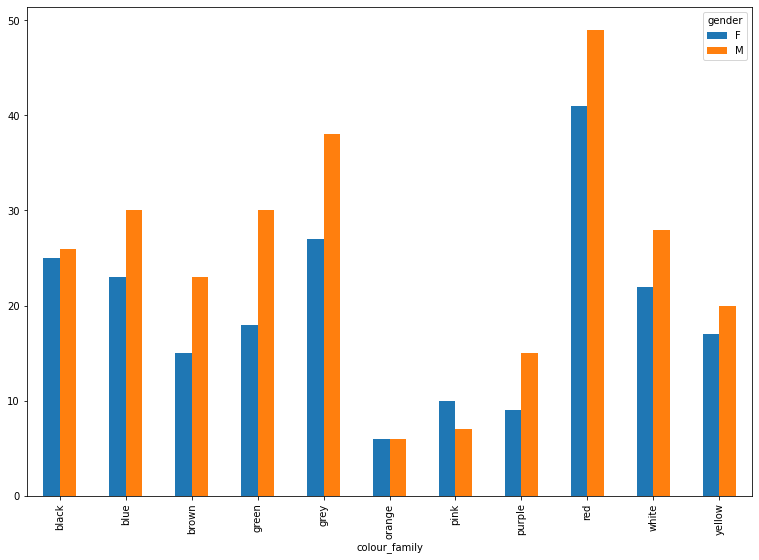

In [ ]:
gender_colour(second_df)

gender                F         M
colour_family                    
black          0.490196  0.509804
blue           0.433962  0.566038
brown          0.394737  0.605263
green          0.375000  0.625000
grey           0.415385  0.584615
orange         0.500000  0.500000
pink           0.588235  0.411765
purple         0.375000  0.625000
red            0.455556  0.544444
white          0.440000  0.560000
yellow         0.459459  0.540541


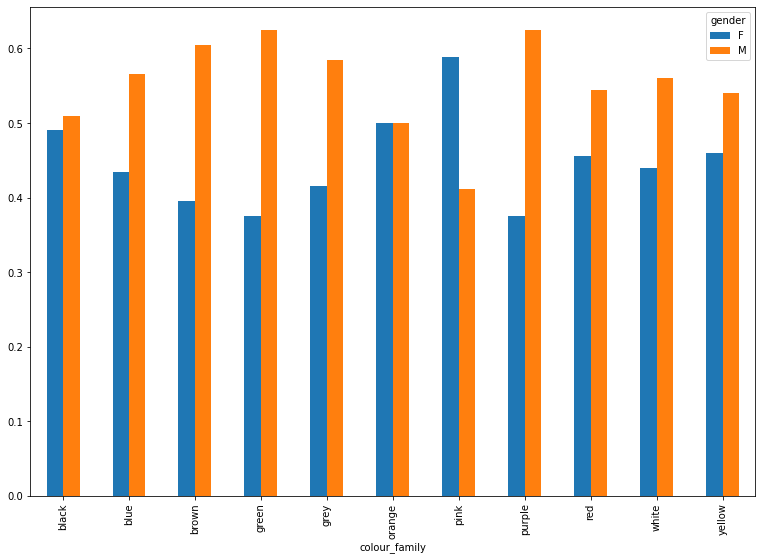

In [ ]:
norm_gender_colour(second_df)

gender          F   M
colour_family        
black          20  61
blue           27  45
brown          26  44
green          23  50
grey           30  66
orange         12  11
pink           17  21
purple         21  21
red            58  88
white          25  61
yellow         23  38


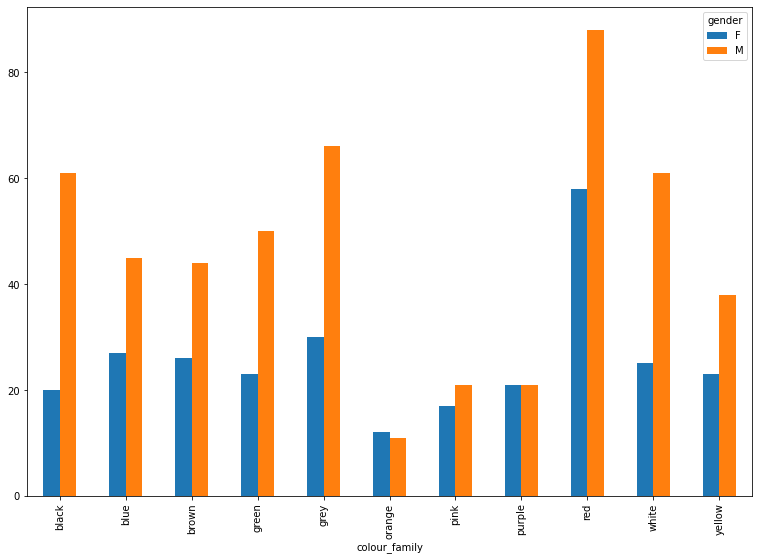

In [ ]:
gender_colour(third_df)

gender                F         M
colour_family                    
black          0.246914  0.753086
blue           0.375000  0.625000
brown          0.371429  0.628571
green          0.315068  0.684932
grey           0.312500  0.687500
orange         0.521739  0.478261
pink           0.447368  0.552632
purple         0.500000  0.500000
red            0.397260  0.602740
white          0.290698  0.709302
yellow         0.377049  0.622951


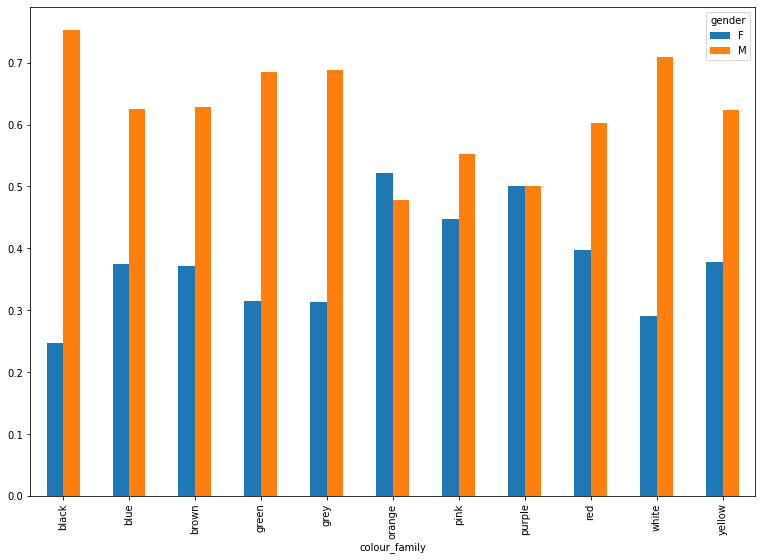

In [ ]:
norm_gender_colour(third_df)

In [ ]:
def gender(df):
  raw_gender_count = df['gender'].value_counts()
  norm_gender_count = df['gender'].value_counts(normalize = True)
  print(raw_gender_count)
  print(norm_gender_count)
  return 

In [ ]:
gender(umbrella_df)

M    889
F    544
Name: gender, dtype: int64
M    0.620377
F    0.379623
Name: gender, dtype: float64


In [ ]:
gender(first_df)

M    111
F     49
Name: gender, dtype: int64
M    0.69375
F    0.30625
Name: gender, dtype: float64


In [ ]:
gender(second_df)

M    272
F    213
Name: gender, dtype: int64
M    0.560825
F    0.439175
Name: gender, dtype: float64


In [ ]:
gender(third_df)

M    506
F    282
Name: gender, dtype: int64
M    0.642132
F    0.357868
Name: gender, dtype: float64


In [ ]:
def colour_emotion(df):
  colour_emotion = df.groupby('colour_family')[reference_predictor].value_counts(normalize = True).unstack()
  print(colour_emotion)
  colour_emotion.plot(kind = 'bar', figsize = (13, 9), width = 0.8)
  plt.xticks(rotation = 90)
  return plt.show()

bert_20           anger      fear       joy      love   sadness  surprise
colour_family                                                            
black          0.372671  0.167702  0.354037  0.018634  0.086957       NaN
blue           0.271429  0.085714  0.471429  0.064286  0.092857  0.014286
brown          0.414634  0.081301  0.365854  0.032520  0.097561  0.008130
green          0.194030  0.104478  0.604478  0.037313  0.052239  0.007463
grey           0.316940  0.109290  0.409836  0.049180  0.098361  0.016393
orange         0.135135  0.108108  0.594595  0.108108  0.054054       NaN
pink           0.285714  0.053571  0.446429  0.142857  0.053571  0.017857
purple         0.323529  0.147059  0.367647  0.102941  0.058824       NaN
red            0.345865  0.109023  0.372180  0.052632  0.093985  0.026316
white          0.278481  0.145570  0.455696  0.063291  0.044304  0.012658
yellow         0.308411  0.121495  0.401869  0.018692  0.121495  0.028037


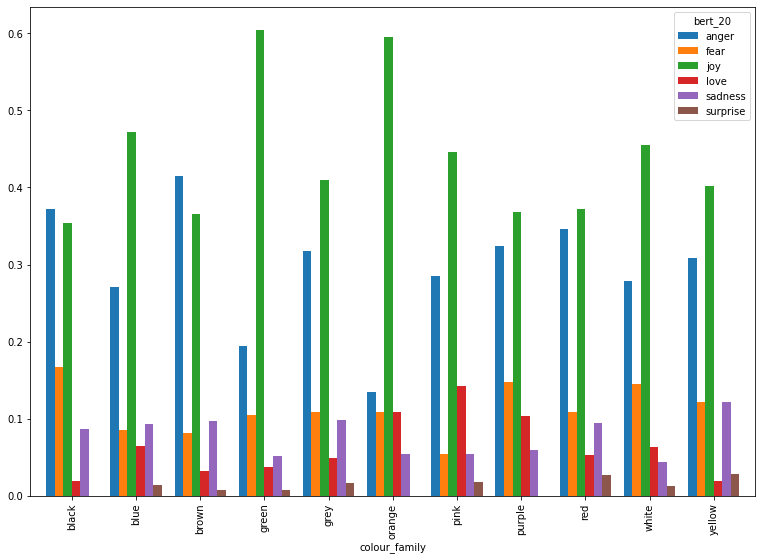

In [ ]:
colour_emotion(umbrella_df)

bert_20           anger      fear       joy      love   sadness  surprise
colour_family                                                            
black          0.310345  0.103448  0.551724       NaN  0.034483       NaN
blue           0.400000  0.066667  0.466667  0.066667       NaN       NaN
brown          0.400000  0.133333  0.466667       NaN       NaN       NaN
green          0.076923       NaN  0.692308       NaN  0.230769       NaN
grey           0.363636       NaN  0.545455  0.045455       NaN  0.045455
orange         1.000000       NaN       NaN       NaN       NaN       NaN
pink                NaN       NaN  1.000000       NaN       NaN       NaN
purple              NaN       NaN  1.000000       NaN       NaN       NaN
red            0.533333  0.166667  0.233333  0.033333  0.033333       NaN
white          0.227273  0.090909  0.590909  0.090909       NaN       NaN
yellow         0.666667       NaN  0.111111       NaN  0.222222       NaN


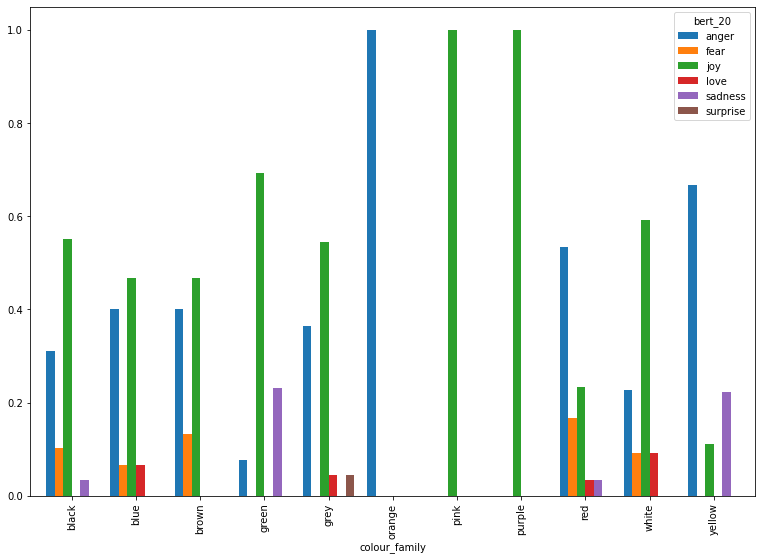

In [ ]:
colour_emotion(first_df)

bert_20           anger      fear       joy      love   sadness  surprise
colour_family                                                            
black          0.411765  0.196078  0.274510  0.019608  0.098039       NaN
blue           0.245283  0.094340  0.452830  0.075472  0.132075       NaN
brown          0.473684  0.052632  0.315789  0.052632  0.105263       NaN
green          0.166667  0.083333  0.645833  0.062500  0.020833  0.020833
grey           0.276923  0.138462  0.369231  0.076923  0.123077  0.015385
orange         0.083333  0.166667  0.583333  0.166667       NaN       NaN
pink           0.176471       NaN  0.470588  0.235294  0.117647       NaN
purple         0.250000  0.083333  0.375000  0.125000  0.166667       NaN
red            0.344444  0.088889  0.344444  0.077778  0.122222  0.022222
white          0.280000  0.200000  0.360000  0.100000  0.040000  0.020000
yellow         0.270270  0.027027  0.486486  0.027027  0.162162  0.027027


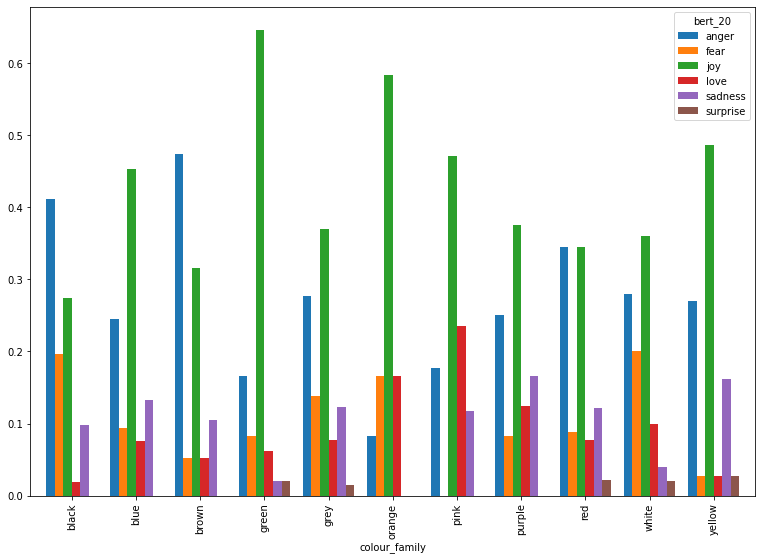

In [ ]:
colour_emotion(second_df)

bert_20           anger      fear       joy      love   sadness  surprise
colour_family                                                            
black          0.370370  0.172840  0.333333  0.024691  0.098765       NaN
blue           0.263889  0.083333  0.486111  0.055556  0.083333  0.027778
brown          0.385714  0.085714  0.371429  0.028571  0.114286  0.014286
green          0.232877  0.136986  0.561644  0.027397  0.041096       NaN
grey           0.333333  0.114583  0.406250  0.031250  0.104167  0.010417
orange         0.086957  0.086957  0.652174  0.086957  0.086957       NaN
pink           0.342105  0.078947  0.421053  0.105263  0.026316  0.026316
purple         0.380952  0.190476  0.333333  0.095238       NaN       NaN
red            0.308219  0.109589  0.417808  0.041096  0.089041  0.034247
white          0.290698  0.127907  0.476744  0.034884  0.058140  0.011628
yellow         0.278689  0.196721  0.393443  0.016393  0.081967  0.032787


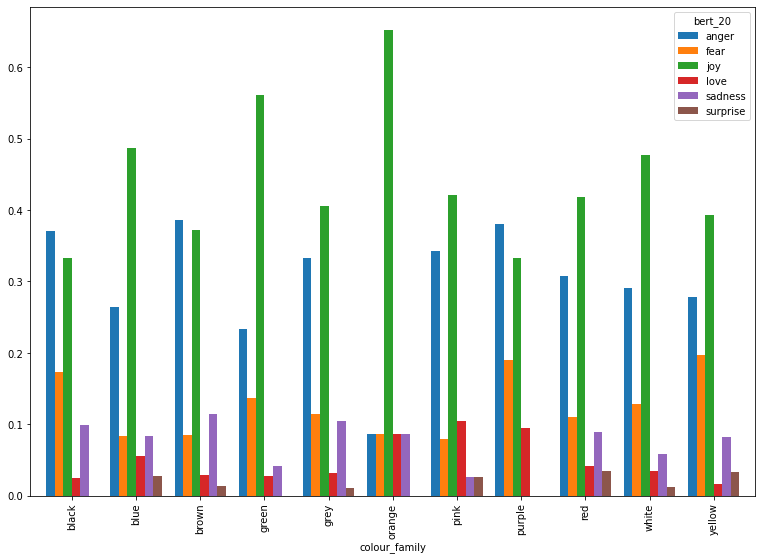

In [ ]:
colour_emotion(third_df)

In [ ]:
def colour_term_count_plot(df):
  colour_count = df['match'].value_counts(normalize = True)
  print(colour_count)
  plt.figure(figsize = (14, 7))
  colour_count.plot(kind = 'bar')
  plt.xticks(rotation = 90)
  return plt.show()

def colour_family_count_plot(df):
  family_count = df['colour_family'].value_counts(normalize = True)
  print(family_count)
  plt.figure(figsize = (14, 7))
  family_count.plot(kind = 'bar')
  plt.xticks(rotation = 90)
  return plt.show()

def colour_emotion(df):
  group = df.groupby(['colour_family', reference_predictor]).size().unstack()
  print(group)
  group.T.plot.pie(subplots=True, layout=(6, 2), figsize=(20, 80), radius = 1.2, autopct='%.0f%%', legend = False)
  return 

def colour_gender_emotion(df):
  group = df.groupby(['colour_family', 'gender', reference_predictor]).size().unstack()
  print(group)
  #size = len(group)
  #cols = round(math.sqrt(size))
  #rows = cols
  #while rows * cols < size:
  #  rows += 1
  group.T.plot.pie(subplots=True, layout=(11, 2), figsize=(20, 80), radius = 1.2, autopct='%.0f%%', legend = False)
  return 

black        0.112352
white        0.106071
red          0.087927
green        0.087230
blue         0.085136
brown        0.066992
yellow       0.063503
grey         0.060014
silver       0.050942
scarlet      0.043266
crimson      0.038381
pink         0.036288
purple       0.034892
gray         0.016748
orange       0.013957
amber        0.011863
ruby         0.011165
flaxen       0.010468
azure        0.009770
tawny        0.009770
russet       0.008374
violet       0.006978
emerald      0.006281
creamy       0.004187
maroon       0.004187
turquoise    0.002791
mauve        0.002791
indigo       0.002791
carnation    0.001396
umber        0.000698
magenta      0.000698
ecru         0.000698
cerise       0.000698
khaki        0.000698
Name: match, dtype: float64


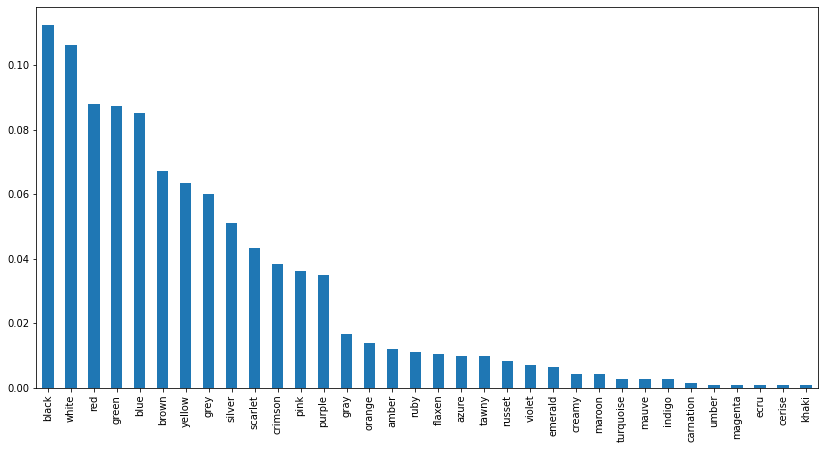

In [ ]:
colour_term_count_plot(umbrella_df)

red       0.185625
grey      0.127704
black     0.112352
white     0.110258
blue      0.097697
green     0.093510
brown     0.085834
yellow    0.074669
purple    0.047453
pink      0.039079
orange    0.025820
Name: colour_family, dtype: float64


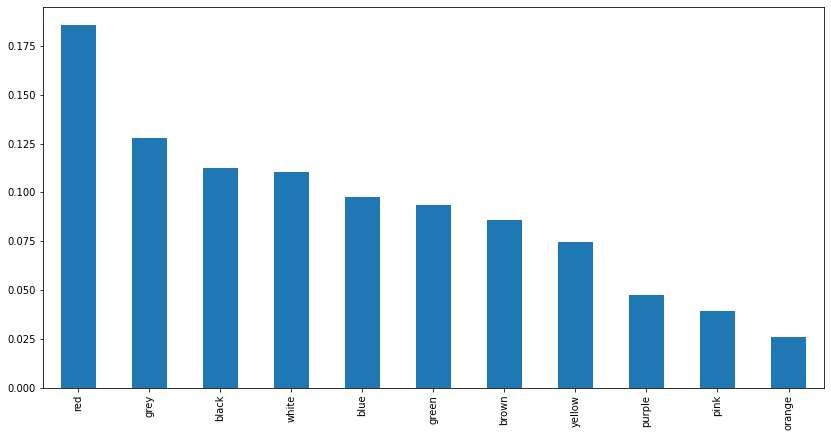

In [ ]:
colour_family_count_plot(umbrella_df)

black      0.18125
white      0.13750
red        0.13125
blue       0.08750
brown      0.08750
green      0.08125
grey       0.07500
silver     0.05000
yellow     0.05000
scarlet    0.03125
crimson    0.02500
gray       0.01250
orange     0.01250
azure      0.00625
purple     0.00625
tawny      0.00625
flaxen     0.00625
pink       0.00625
violet     0.00625
Name: match, dtype: float64


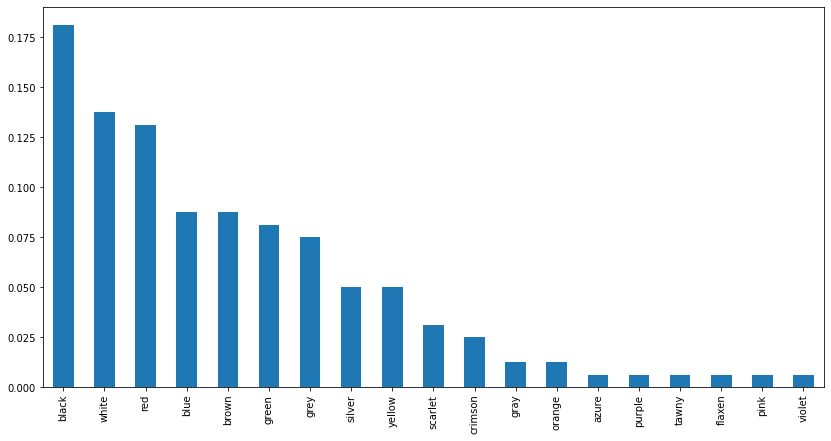

In [ ]:
colour_term_count_plot(first_df)

red       0.18750
black     0.18125
white     0.13750
grey      0.13750
blue      0.09375
brown     0.09375
green     0.08125
yellow    0.05625
orange    0.01250
purple    0.01250
pink      0.00625
Name: colour_family, dtype: float64


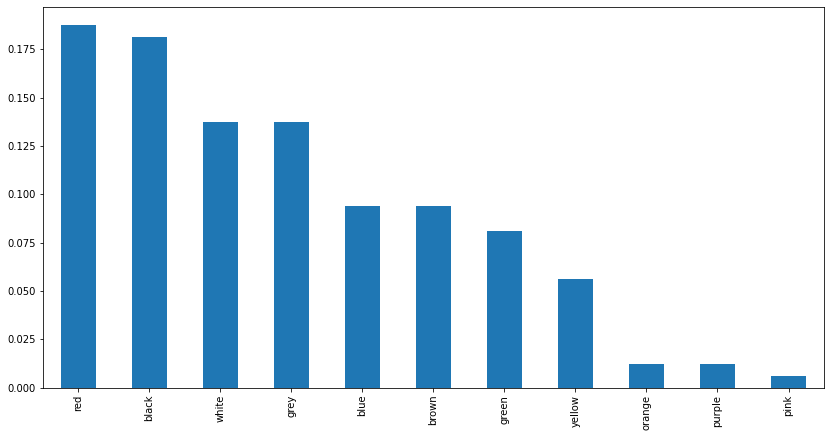

In [ ]:
colour_family_count_plot(first_df)

black        0.105155
white        0.101031
blue         0.092784
green        0.088660
red          0.076289
yellow       0.061856
silver       0.059794
brown        0.057732
grey         0.053608
crimson      0.045361
scarlet      0.045361
purple       0.039175
pink         0.032990
gray         0.020619
ruby         0.018557
orange       0.014433
azure        0.014433
flaxen       0.014433
russet       0.012371
emerald      0.010309
amber        0.010309
violet       0.010309
tawny        0.008247
creamy       0.002062
carnation    0.002062
turquoise    0.002062
Name: match, dtype: float64


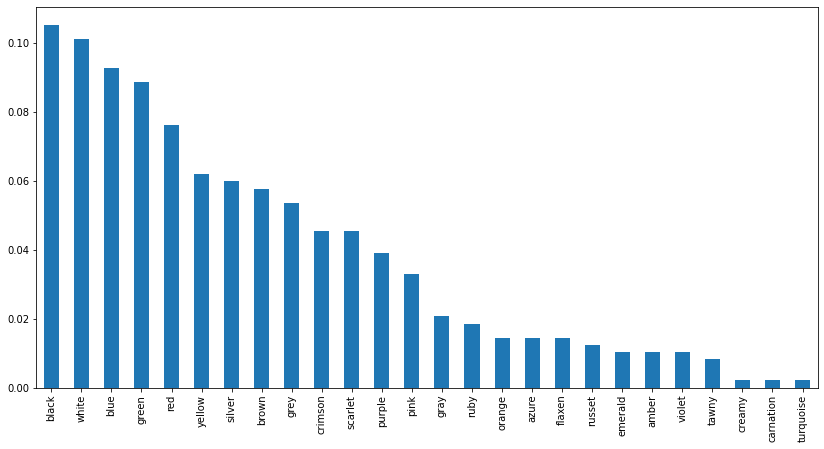

In [ ]:
colour_term_count_plot(second_df)

red       0.185567
grey      0.134021
blue      0.109278
black     0.105155
white     0.103093
green     0.098969
brown     0.078351
yellow    0.076289
purple    0.049485
pink      0.035052
orange    0.024742
Name: colour_family, dtype: float64


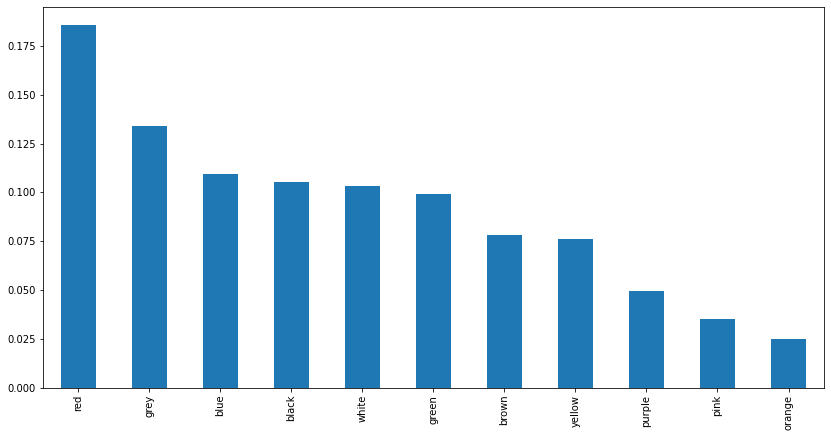

In [ ]:
colour_family_count_plot(second_df)

white        0.102792
black        0.102792
green        0.087563
red          0.086294
blue         0.079949
brown        0.068528
yellow       0.067259
grey         0.060914
silver       0.045685
scarlet      0.044416
pink         0.044416
purple       0.038071
crimson      0.036802
gray         0.015228
amber        0.015228
orange       0.013959
tawny        0.011421
ruby         0.008883
flaxen       0.008883
maroon       0.007614
azure        0.007614
russet       0.007614
creamy       0.006345
indigo       0.005076
emerald      0.005076
violet       0.005076
mauve        0.005076
turquoise    0.003807
umber        0.001269
carnation    0.001269
magenta      0.001269
ecru         0.001269
cerise       0.001269
khaki        0.001269
Name: match, dtype: float64


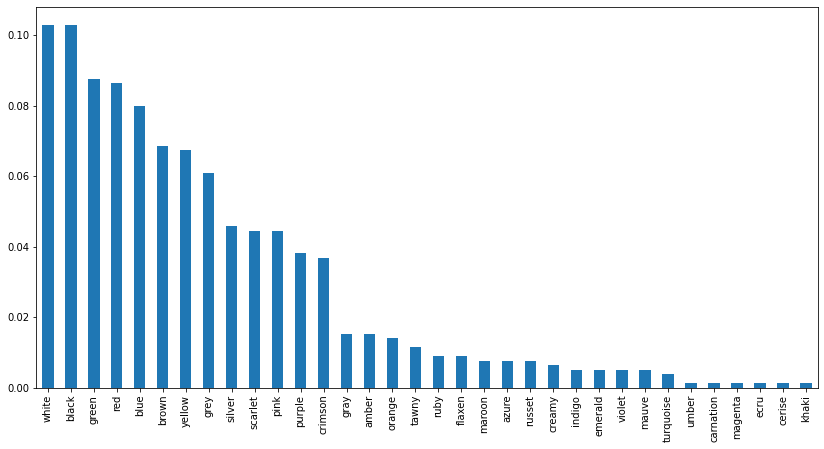

In [ ]:
colour_term_count_plot(third_df)

red       0.185279
grey      0.121827
white     0.109137
black     0.102792
green     0.092640
blue      0.091371
brown     0.088832
yellow    0.077411
purple    0.053299
pink      0.048223
orange    0.029188
Name: colour_family, dtype: float64


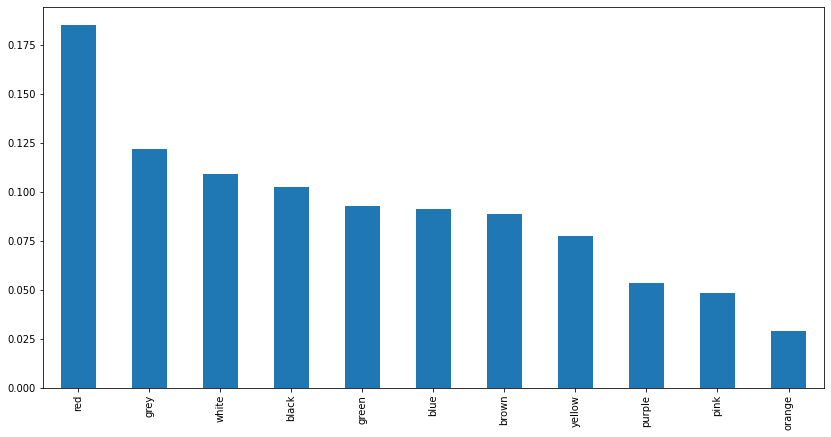

In [ ]:
colour_family_count_plot(third_df)

bert_20        anger  fear   joy  love  sadness  surprise
colour_family                                            
black           60.0  27.0  57.0   3.0     14.0       NaN
blue            38.0  12.0  66.0   9.0     13.0       2.0
brown           51.0  10.0  45.0   4.0     12.0       1.0
green           26.0  14.0  81.0   5.0      7.0       1.0
grey            58.0  20.0  75.0   9.0     18.0       3.0
orange           5.0   4.0  22.0   4.0      2.0       NaN
pink            16.0   3.0  25.0   8.0      3.0       1.0
purple          22.0  10.0  25.0   7.0      4.0       NaN
red             92.0  29.0  99.0  14.0     25.0       7.0
white           44.0  23.0  72.0  10.0      7.0       2.0
yellow          33.0  13.0  43.0   2.0     13.0       3.0


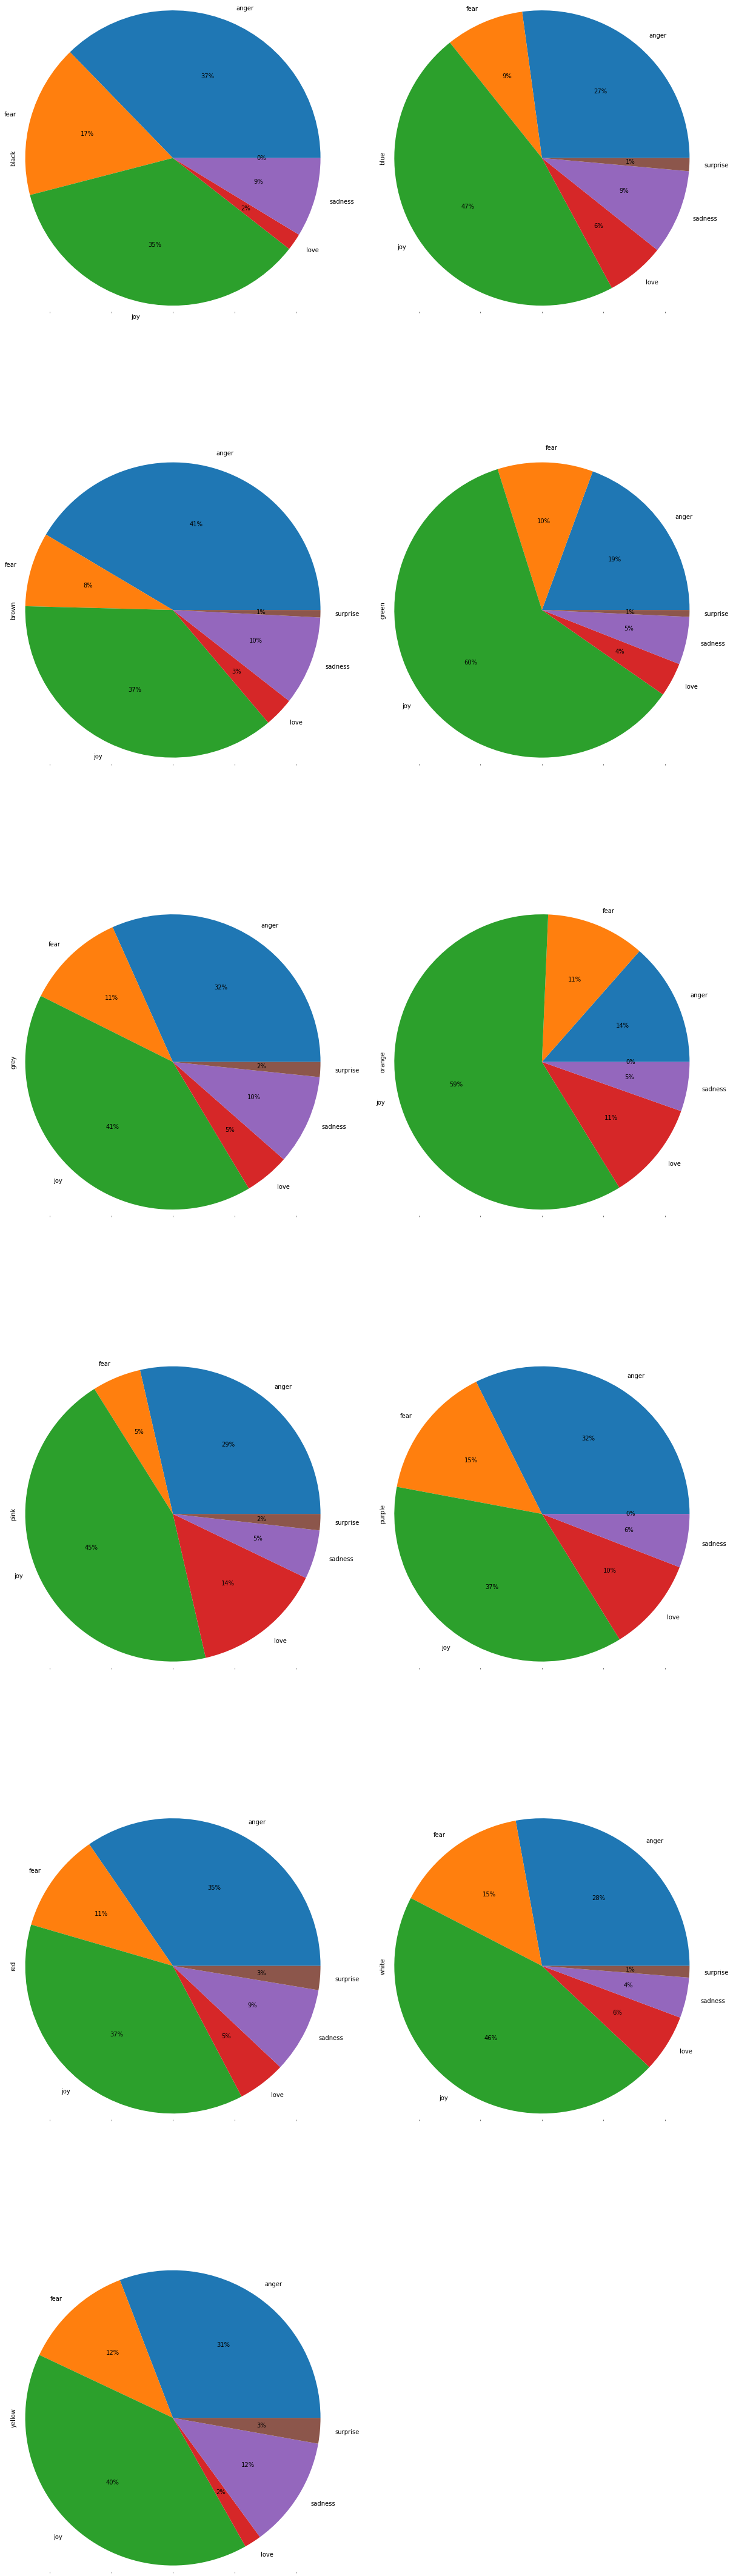

In [ ]:
colour_emotion(umbrella_df)

bert_20        anger  fear   joy  love  sadness  surprise
colour_family                                            
black            9.0   3.0  16.0   NaN      1.0       NaN
blue             6.0   1.0   7.0   1.0      NaN       NaN
brown            6.0   2.0   7.0   NaN      NaN       NaN
green            1.0   NaN   9.0   NaN      3.0       NaN
grey             8.0   NaN  12.0   1.0      NaN       1.0
orange           2.0   NaN   NaN   NaN      NaN       NaN
pink             NaN   NaN   1.0   NaN      NaN       NaN
purple           NaN   NaN   2.0   NaN      NaN       NaN
red             16.0   5.0   7.0   1.0      1.0       NaN
white            5.0   2.0  13.0   2.0      NaN       NaN
yellow           6.0   NaN   1.0   NaN      2.0       NaN


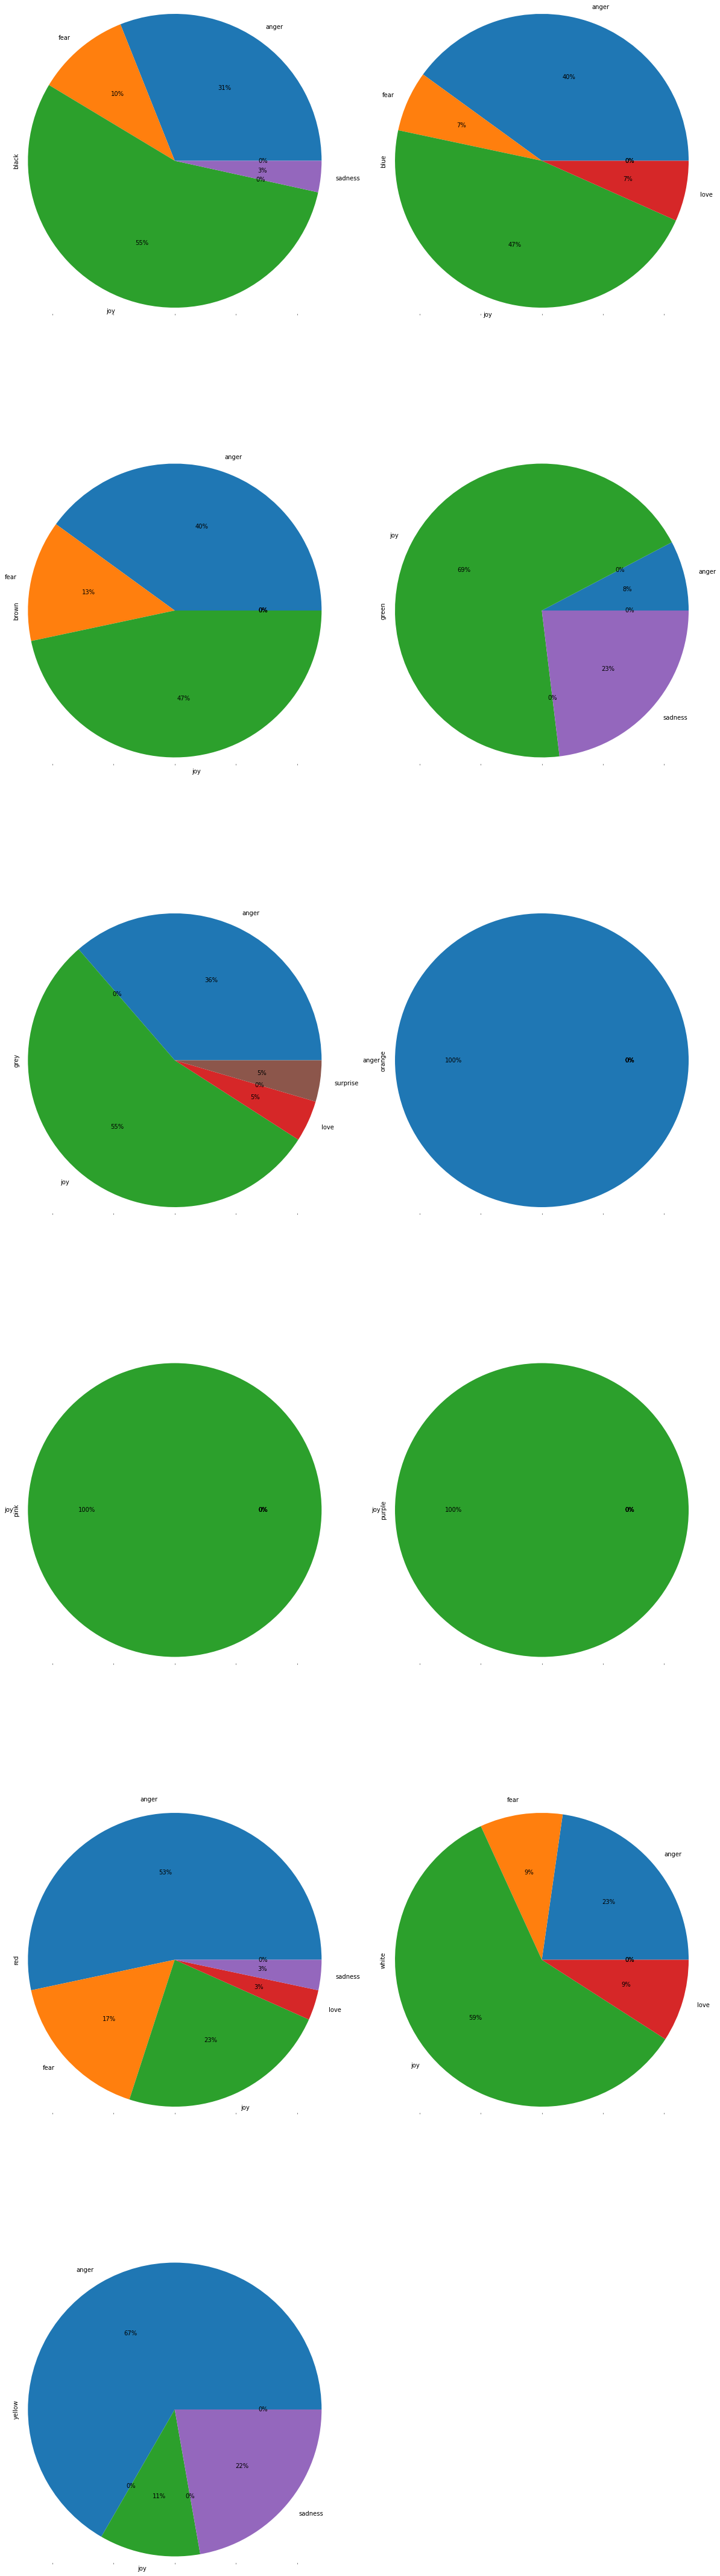

In [ ]:
colour_emotion(first_df)

bert_20        anger  fear   joy  love  sadness  surprise
colour_family                                            
black           21.0  10.0  14.0   1.0      5.0       NaN
blue            13.0   5.0  24.0   4.0      7.0       NaN
brown           18.0   2.0  12.0   2.0      4.0       NaN
green            8.0   4.0  31.0   3.0      1.0       1.0
grey            18.0   9.0  24.0   5.0      8.0       1.0
orange           1.0   2.0   7.0   2.0      NaN       NaN
pink             3.0   NaN   8.0   4.0      2.0       NaN
purple           6.0   2.0   9.0   3.0      4.0       NaN
red             31.0   8.0  31.0   7.0     11.0       2.0
white           14.0  10.0  18.0   5.0      2.0       1.0
yellow          10.0   1.0  18.0   1.0      6.0       1.0


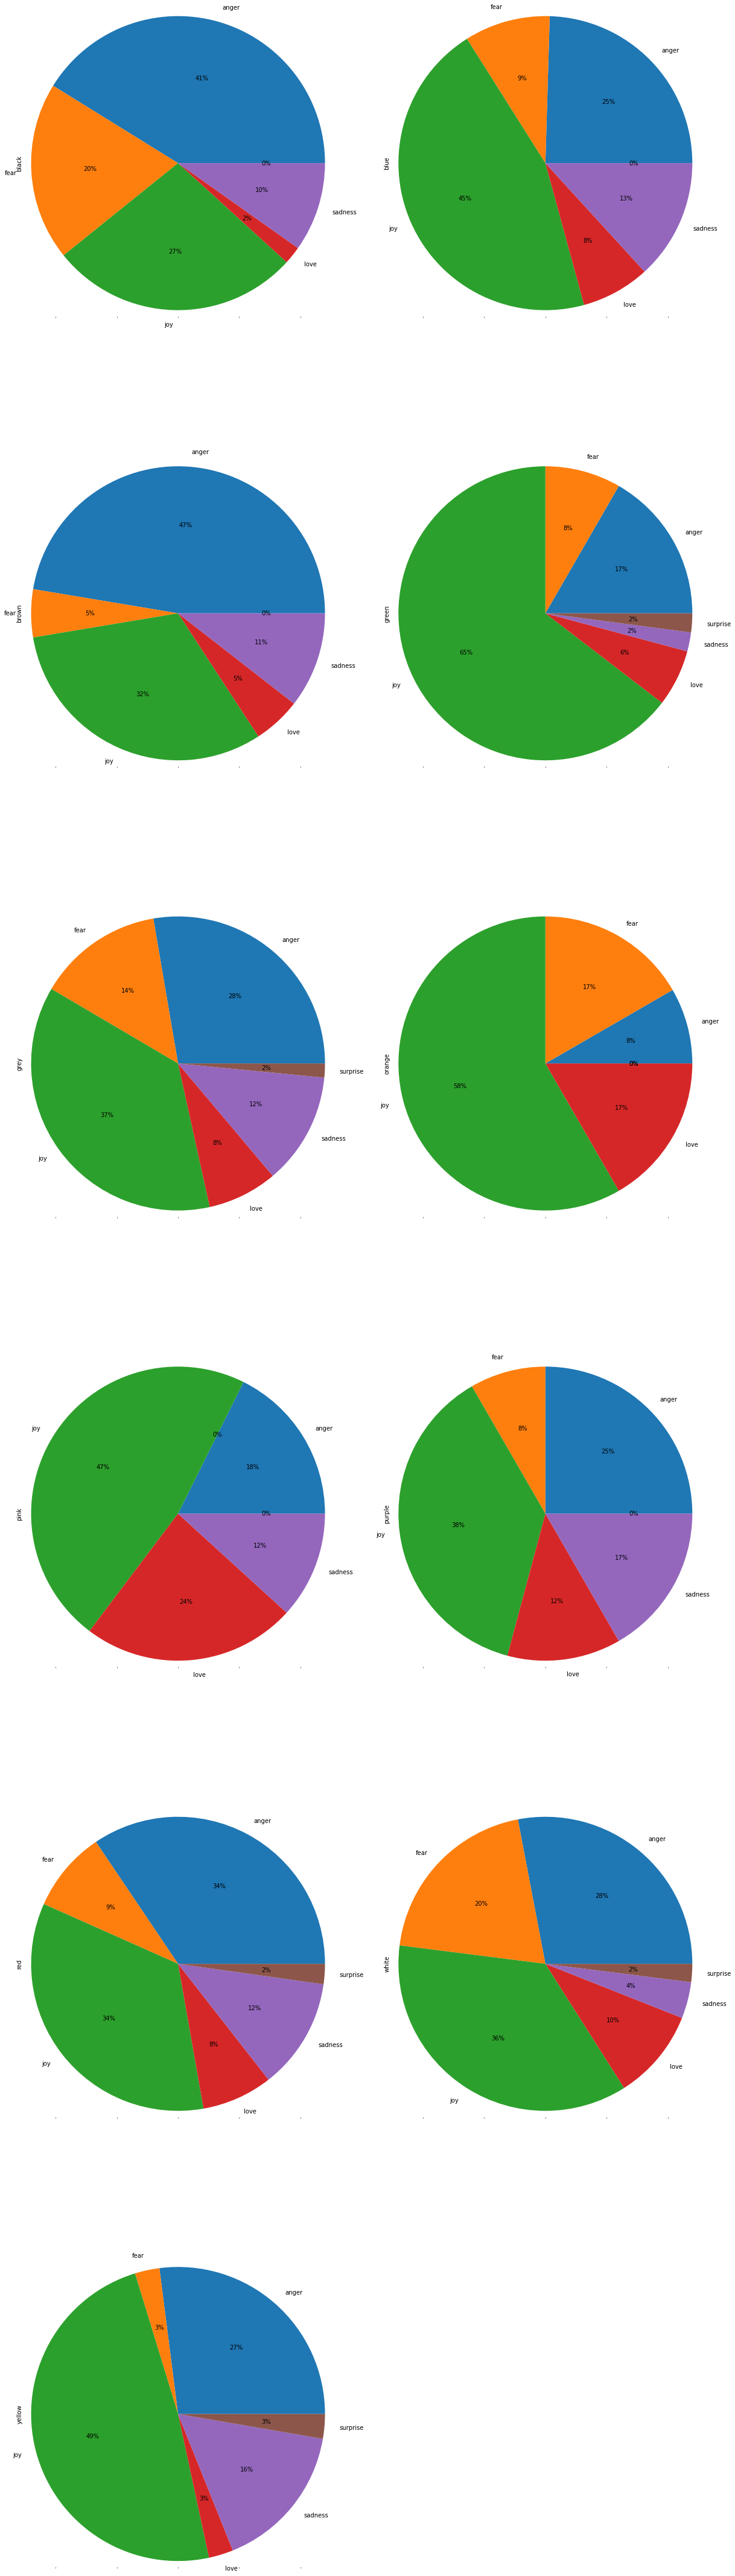

In [ ]:
colour_emotion(second_df)

bert_20        anger  fear   joy  love  sadness  surprise
colour_family                                            
black           30.0  14.0  27.0   2.0      8.0       NaN
blue            19.0   6.0  35.0   4.0      6.0       2.0
brown           27.0   6.0  26.0   2.0      8.0       1.0
green           17.0  10.0  41.0   2.0      3.0       NaN
grey            32.0  11.0  39.0   3.0     10.0       1.0
orange           2.0   2.0  15.0   2.0      2.0       NaN
pink            13.0   3.0  16.0   4.0      1.0       1.0
purple          16.0   8.0  14.0   4.0      NaN       NaN
red             45.0  16.0  61.0   6.0     13.0       5.0
white           25.0  11.0  41.0   3.0      5.0       1.0
yellow          17.0  12.0  24.0   1.0      5.0       2.0


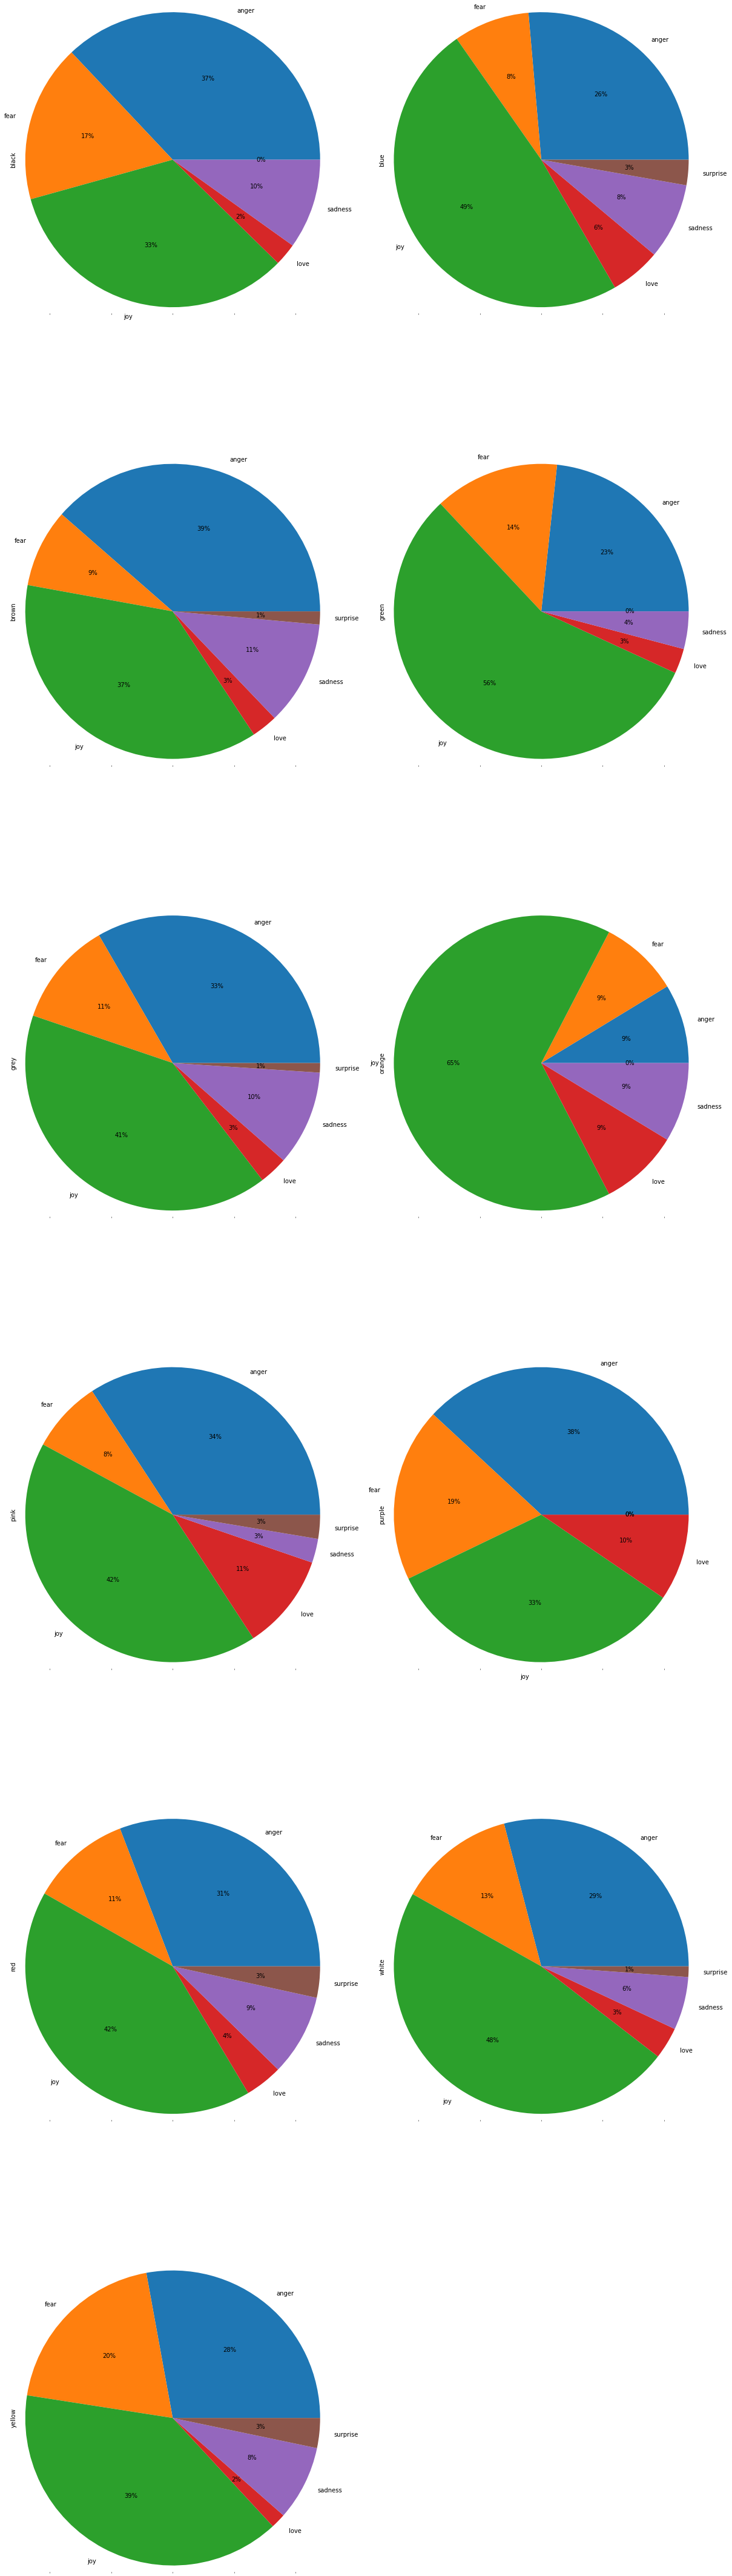

In [ ]:
colour_emotion(third_df)

bert_20               anger  fear   joy  love  sadness  surprise
colour_family gender                                            
black         F        21.0   7.0  18.0   1.0      6.0       NaN
              M        39.0  20.0  39.0   2.0      8.0       NaN
blue          F        16.0   1.0  25.0   4.0      7.0       NaN
              M        22.0  11.0  41.0   5.0      6.0       2.0
brown         F        16.0   4.0  19.0   3.0      4.0       NaN
              M        35.0   6.0  26.0   1.0      8.0       1.0
green         F         6.0   5.0  30.0   3.0      1.0       NaN
              M        20.0   9.0  51.0   2.0      6.0       1.0
grey          F        21.0   5.0  31.0   2.0      5.0       NaN
              M        37.0  15.0  44.0   7.0     13.0       3.0
orange        F         2.0   4.0  11.0   NaN      1.0       NaN
              M         3.0   NaN  11.0   4.0      1.0       NaN
pink          F         7.0   NaN  15.0   5.0      NaN       NaN
              M         9

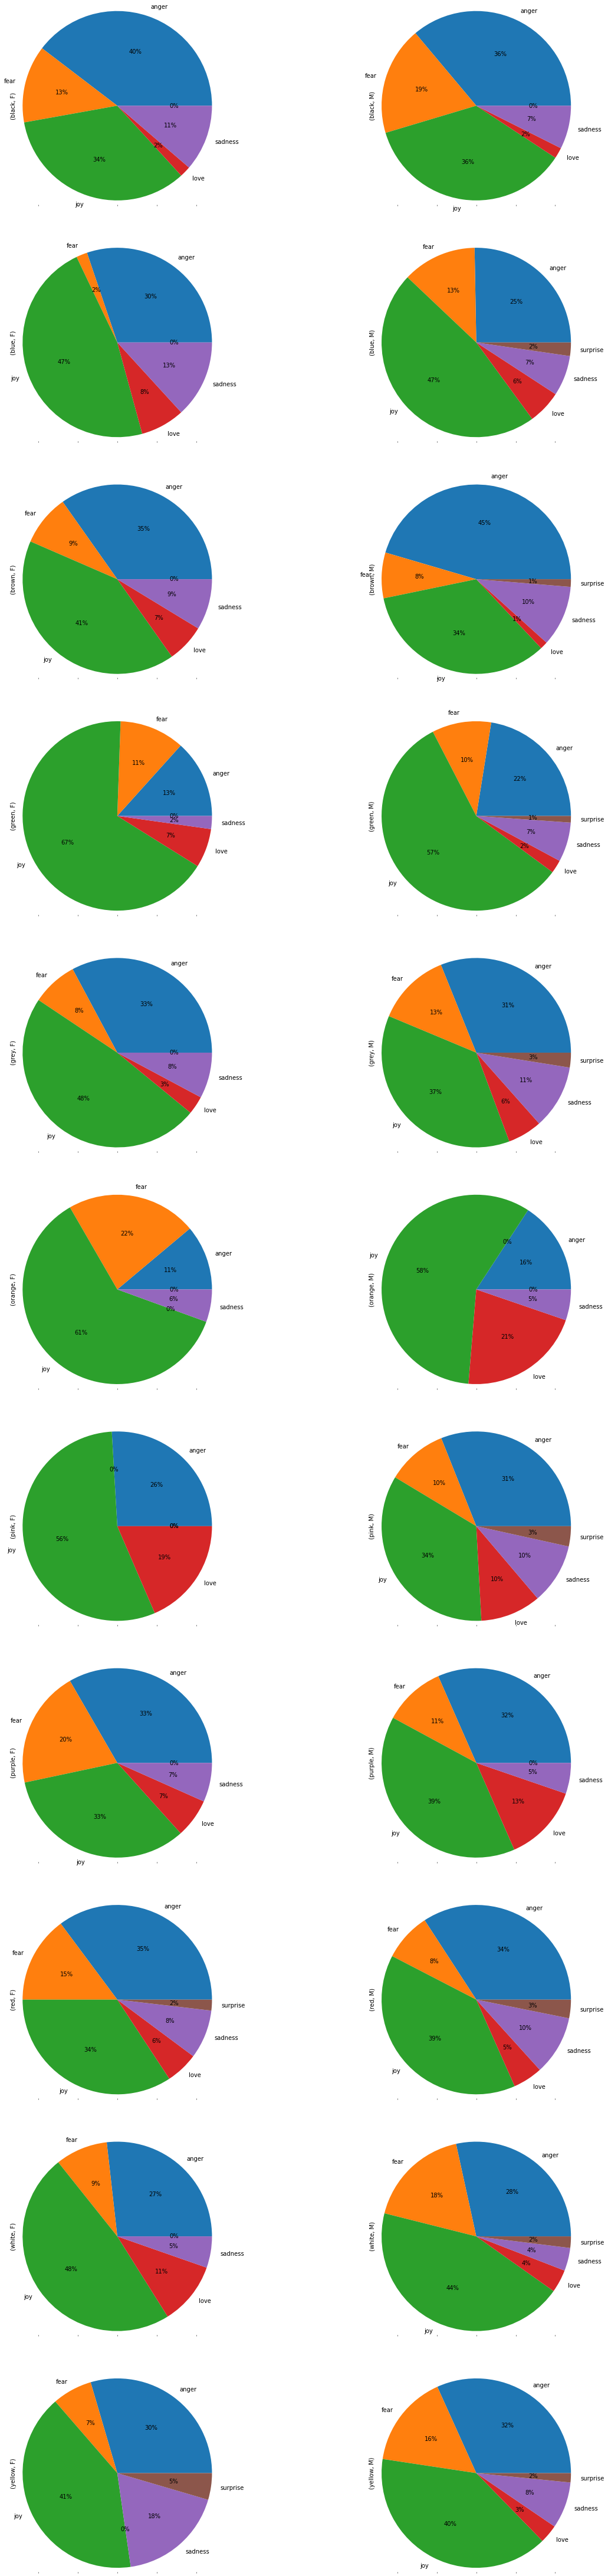

In [ ]:
umbrella_cge = colour_gender_emotion(umbrella_df)

bert_20               anger  fear   joy  love  sadness  surprise
colour_family gender                                            
black         F         2.0   NaN   6.0   NaN      NaN       NaN
              M         7.0   3.0  10.0   NaN      1.0       NaN
blue          F         1.0   NaN   2.0   NaN      NaN       NaN
              M         5.0   1.0   5.0   1.0      NaN       NaN
brown         F         3.0   NaN   2.0   NaN      NaN       NaN
              M         3.0   2.0   5.0   NaN      NaN       NaN
green         F         1.0   NaN   3.0   NaN      NaN       NaN
              M         NaN   NaN   6.0   NaN      3.0       NaN
grey          F         2.0   NaN   5.0   NaN      NaN       NaN
              M         6.0   NaN   7.0   1.0      NaN       1.0
orange        M         2.0   NaN   NaN   NaN      NaN       NaN
pink          M         NaN   NaN   1.0   NaN      NaN       NaN
purple        M         NaN   NaN   2.0   NaN      NaN       NaN
red           F         3

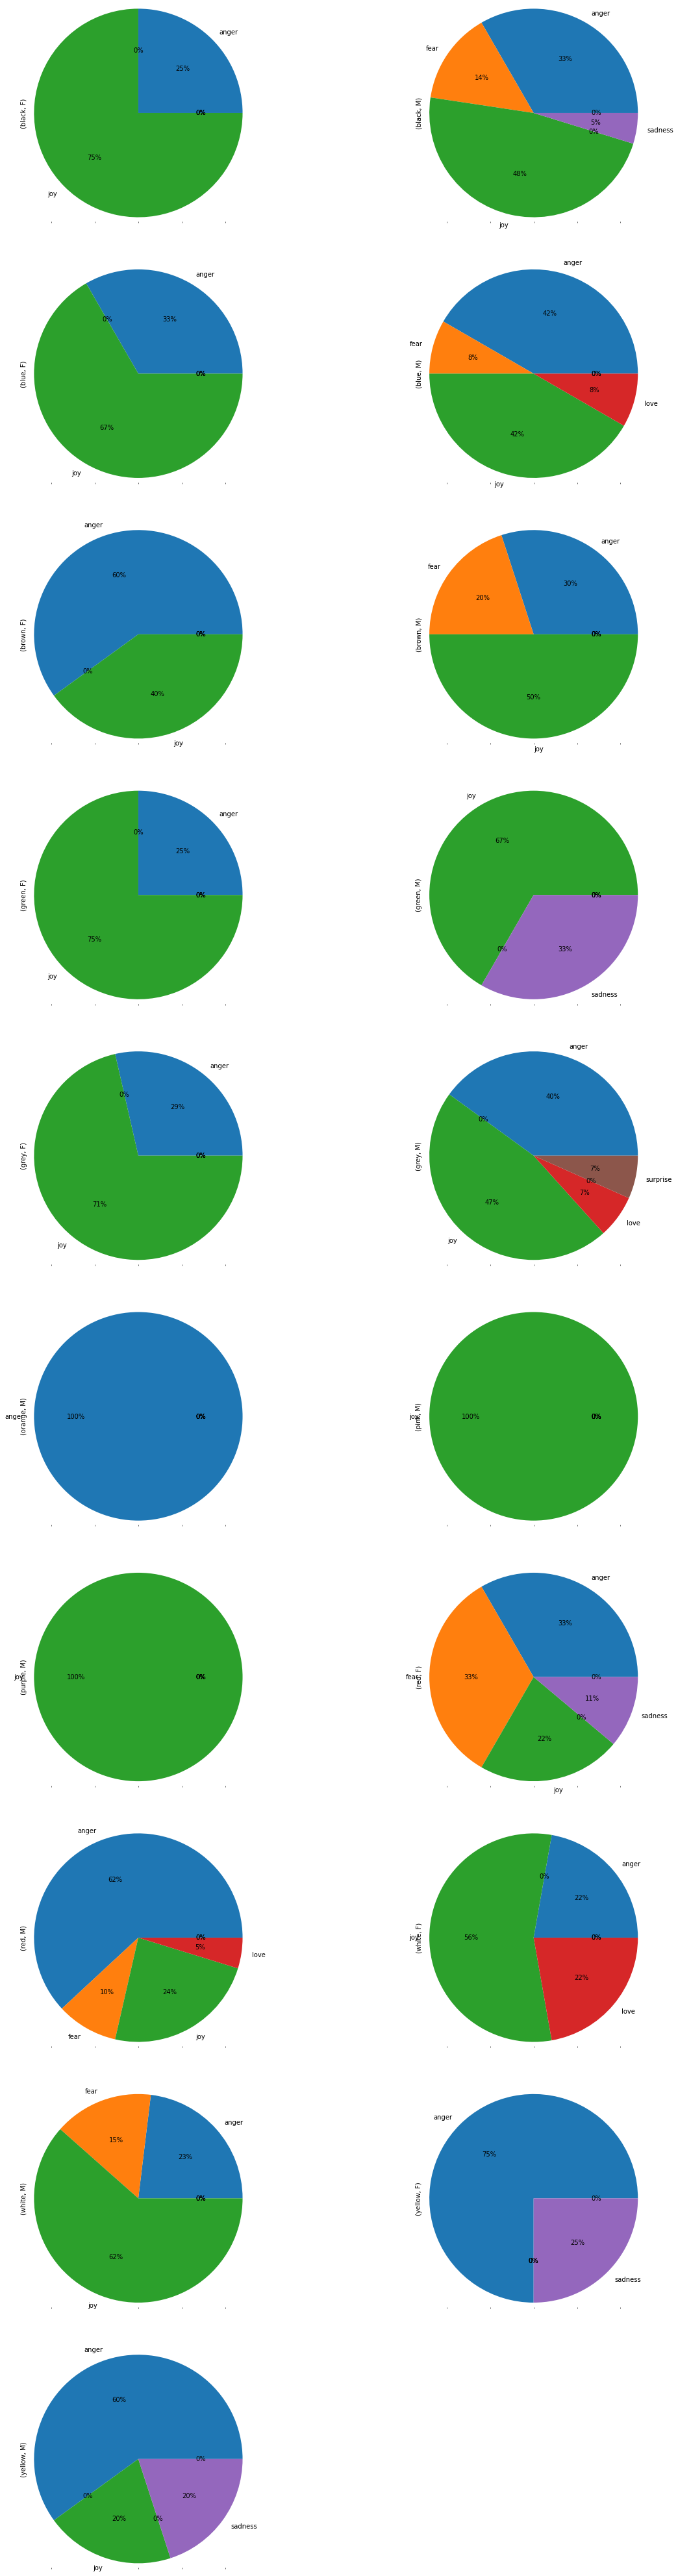

In [ ]:
first_cge = colour_gender_emotion(first_df)

bert_20               anger  fear   joy  love  sadness  surprise
colour_family gender                                            
black         F        10.0   5.0   6.0   1.0      3.0       NaN
              M        11.0   5.0   8.0   NaN      2.0       NaN
blue          F         8.0   1.0   8.0   2.0      4.0       NaN
              M         5.0   4.0  16.0   2.0      3.0       NaN
brown         F         7.0   2.0   4.0   2.0      NaN       NaN
              M        11.0   NaN   8.0   NaN      4.0       NaN
green         F         3.0   1.0  11.0   2.0      1.0       NaN
              M         5.0   3.0  20.0   1.0      NaN       1.0
grey          F        10.0   4.0  11.0   1.0      1.0       NaN
              M         8.0   5.0  13.0   4.0      7.0       1.0
orange        F         NaN   2.0   4.0   NaN      NaN       NaN
              M         1.0   NaN   3.0   2.0      NaN       NaN
pink          F         1.0   NaN   6.0   3.0      NaN       NaN
              M         2

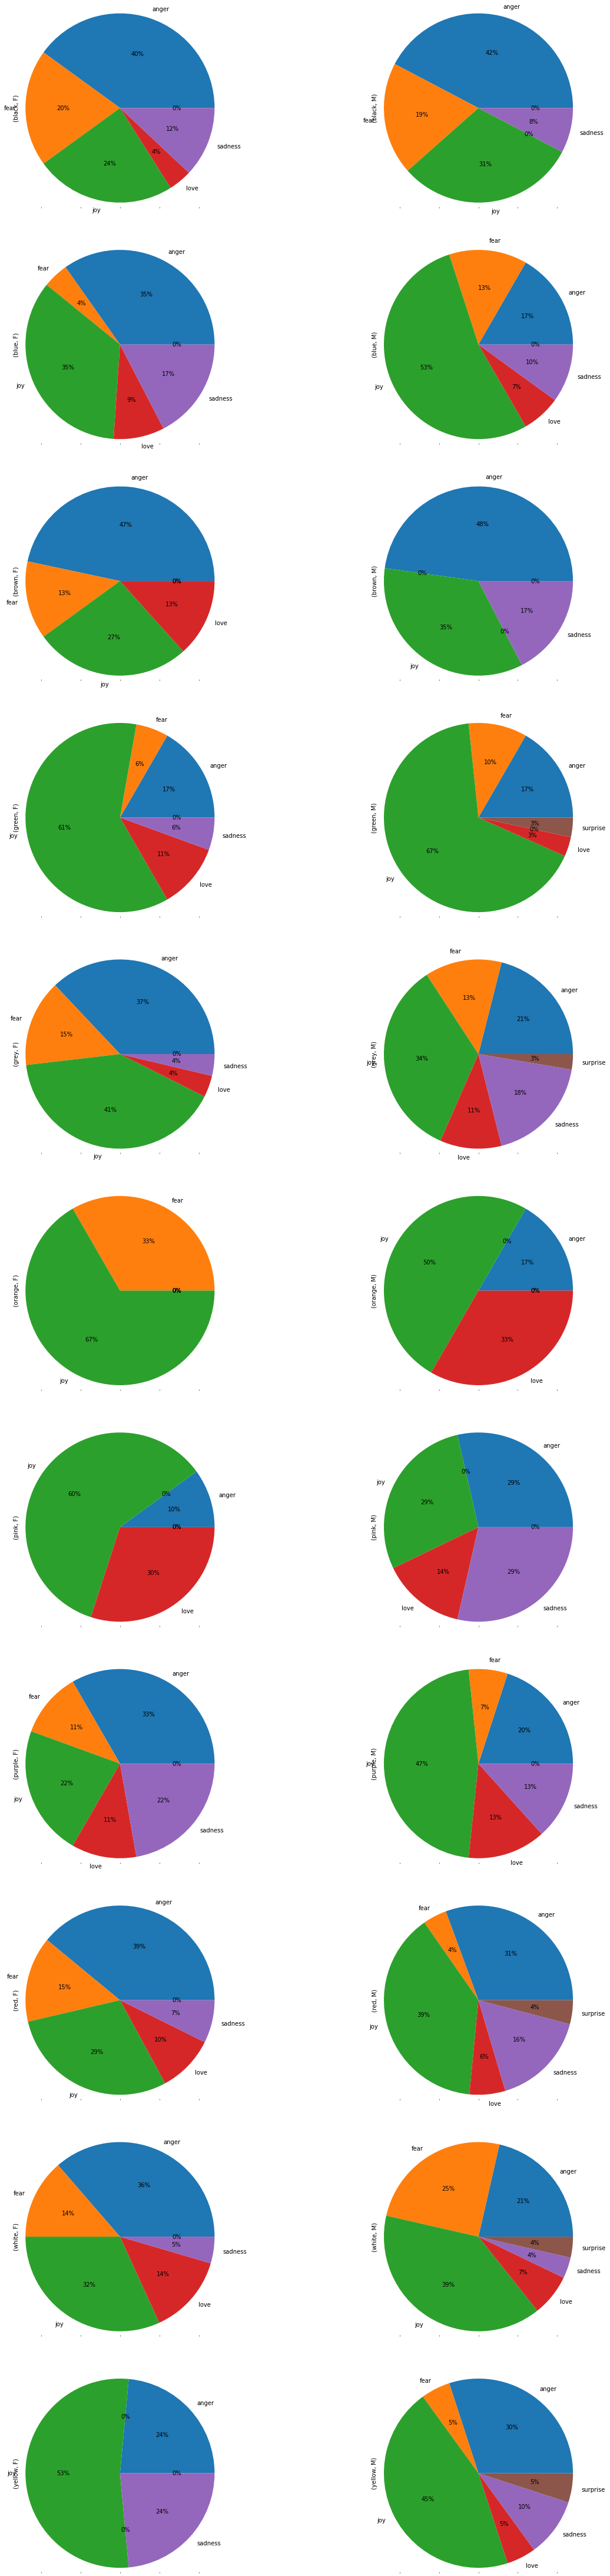

In [ ]:
second_cge = colour_gender_emotion(second_df)

bert_20               anger  fear   joy  love  sadness  surprise
colour_family gender                                            
black         F         9.0   2.0   6.0   NaN      3.0       NaN
              M        21.0  12.0  21.0   2.0      5.0       NaN
blue          F         7.0   NaN  15.0   2.0      3.0       NaN
              M        12.0   6.0  20.0   2.0      3.0       2.0
brown         F         6.0   2.0  13.0   1.0      4.0       NaN
              M        21.0   4.0  13.0   1.0      4.0       1.0
green         F         2.0   4.0  16.0   1.0      NaN       NaN
              M        15.0   6.0  25.0   1.0      3.0       NaN
grey          F         9.0   1.0  15.0   1.0      4.0       NaN
              M        23.0  10.0  24.0   2.0      6.0       1.0
orange        F         2.0   2.0   7.0   NaN      1.0       NaN
              M         NaN   NaN   8.0   2.0      1.0       NaN
pink          F         6.0   NaN   9.0   2.0      NaN       NaN
              M         7

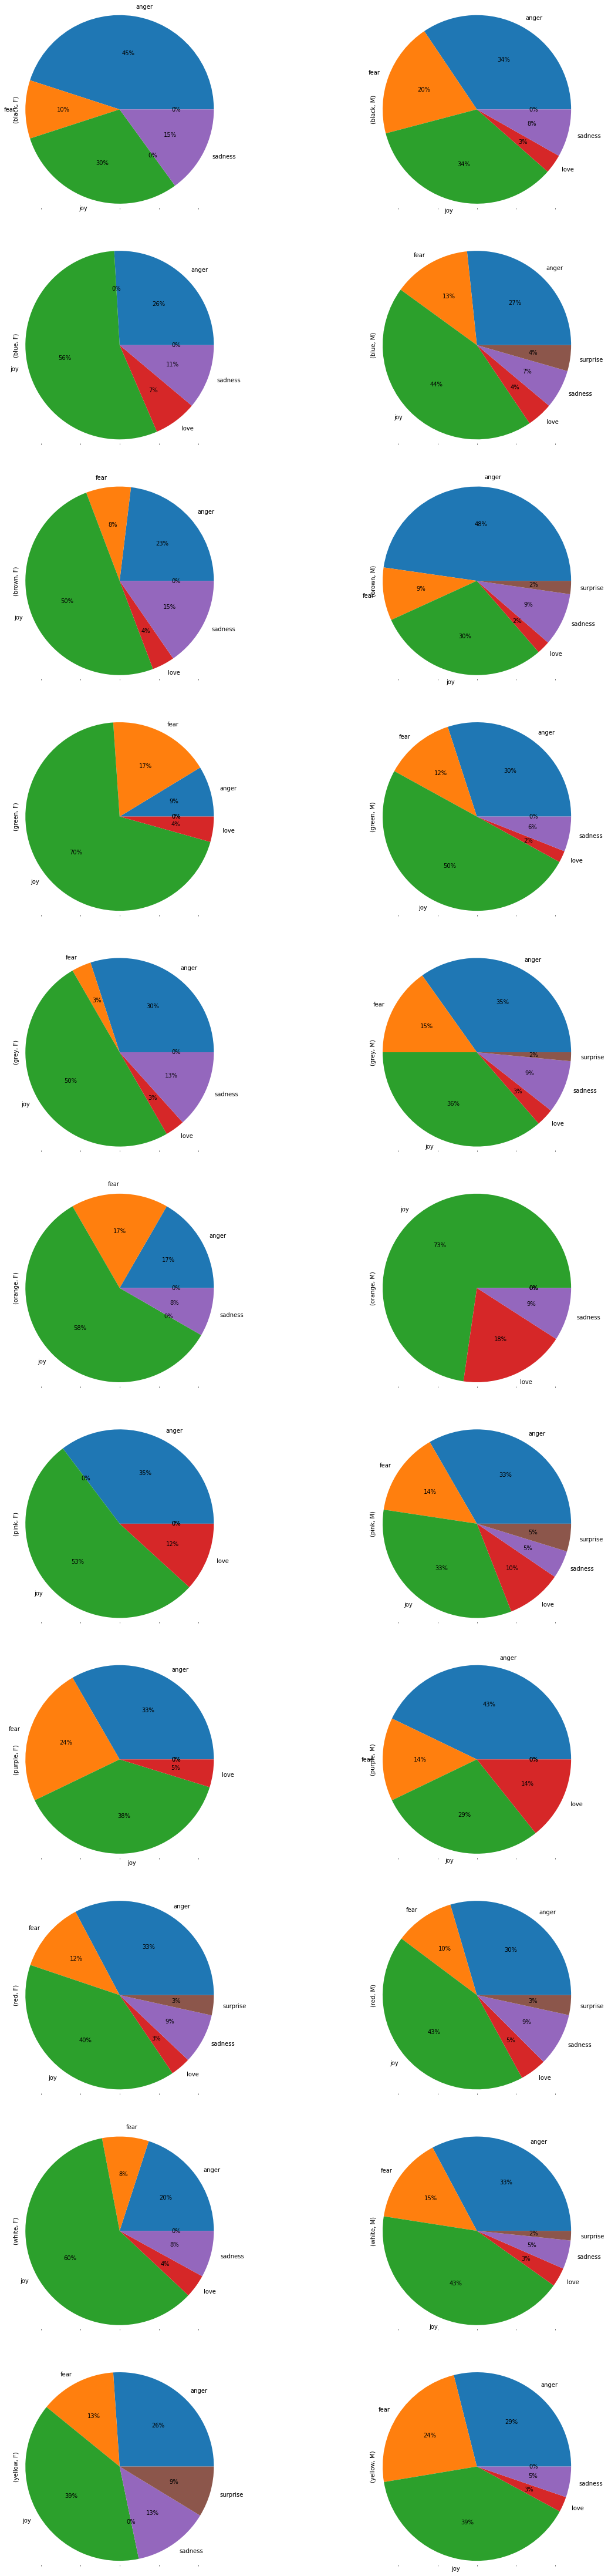

In [ ]:
third_cge = colour_gender_emotion(third_df)

colour_family              black  blue  brown  green  grey  orange  pink  \
period    bert_20  gender                                                  
1710-1780 anger    F         2.0   1.0    3.0    1.0   2.0     NaN   NaN   
                   M         7.0   5.0    3.0    NaN   6.0     2.0   NaN   
          fear     F         NaN   NaN    NaN    NaN   NaN     NaN   NaN   
                   M         3.0   1.0    2.0    NaN   NaN     NaN   NaN   
          joy      F         6.0   2.0    2.0    3.0   5.0     NaN   NaN   
                   M        10.0   5.0    5.0    6.0   7.0     NaN   1.0   
          love     F         NaN   NaN    NaN    NaN   NaN     NaN   NaN   
                   M         NaN   1.0    NaN    NaN   1.0     NaN   NaN   
          sadness  F         NaN   NaN    NaN    NaN   NaN     NaN   NaN   
                   M         1.0   NaN    NaN    3.0   NaN     NaN   NaN   
          surprise M         NaN   NaN    NaN    NaN   1.0     NaN   NaN   
1780-1850 an

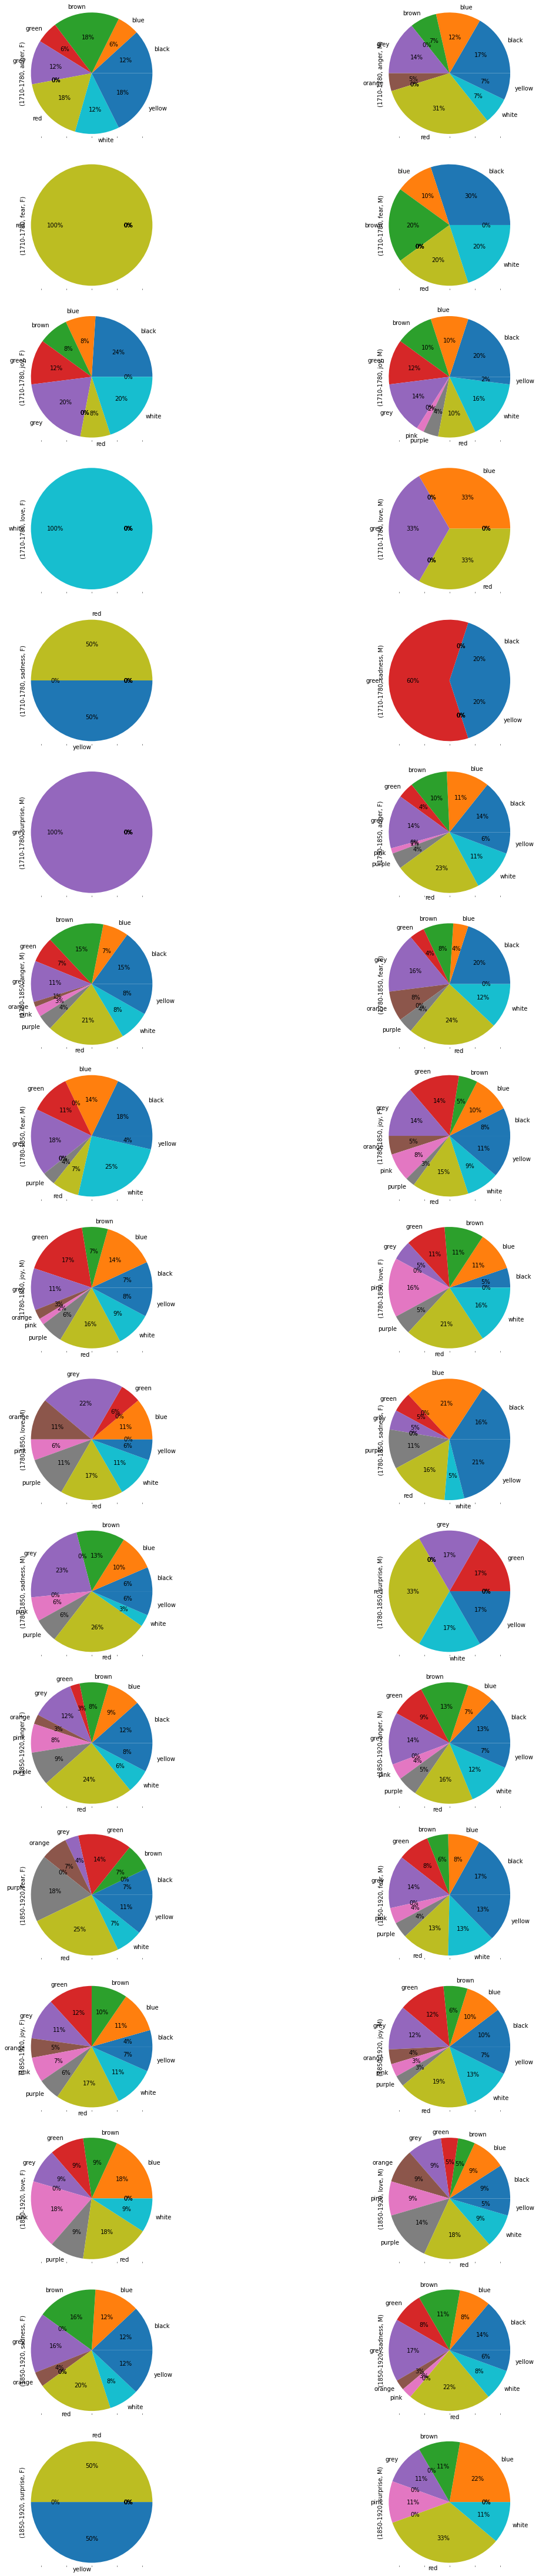

In [ ]:
group = umbrella_df.groupby(['period', reference_predictor, 'gender', 'colour_family']).size().unstack()
group.T.plot.pie(subplots=True, layout=(17, 2), figsize=(20, 80), radius = 1.2, autopct='%.0f%%', legend = False)
print(group)